<a href="https://colab.research.google.com/github/saikumarmogili/RFM/blob/main/RFM_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the UCI Online Retail Dataset from a known online source

# Try loading the dataset
df = pd.read_csv("/content/retail_cleaned_with_guest_ids.csv")

# Display the first few rows and basic info
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CustomerID,AmountSpent,InvoiceMonth,...,IsWeekend,IsReturn,BasketSize,IsInternational,RFM_Segment,RFM_Score,Segment,CohortMonth,Cluster,SegmentLabel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom,17850,15.30,2010-12,...,0,0,7,0,155,11,Champions,2010-12,3,Promising
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom,17850,20.34,2010-12,...,0,0,7,0,155,11,Champions,2010-12,3,Promising
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom,17850,22.00,2010-12,...,0,0,7,0,155,11,Champions,2010-12,3,Promising
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom,17850,20.34,2010-12,...,0,0,7,0,155,11,Champions,2010-12,3,Promising
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom,17850,20.34,2010-12,...,0,0,7,0,155,11,Champions,2010-12,3,Promising


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0
CustomerID,0
AmountSpent,0
InvoiceMonth,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540455 entries, 0 to 540454
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   InvoiceNo        540455 non-null  object 
 1   StockCode        540455 non-null  object 
 2   Description      540455 non-null  object 
 3   Quantity         540455 non-null  int64  
 4   InvoiceDate      540455 non-null  object 
 5   UnitPrice        540455 non-null  float64
 6   Country          540455 non-null  object 
 7   CustomerID       540455 non-null  object 
 8   AmountSpent      540455 non-null  float64
 9   InvoiceMonth     540455 non-null  object 
 10  DayOfWeek        540455 non-null  object 
 11  Hour             540455 non-null  int64  
 12  IsWeekend        540455 non-null  int64  
 13  IsReturn         540455 non-null  int64  
 14  BasketSize       540455 non-null  int64  
 15  IsInternational  540455 non-null  int64  
 16  RFM_Segment      540455 non-null  int6

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='InvoiceMonth'>

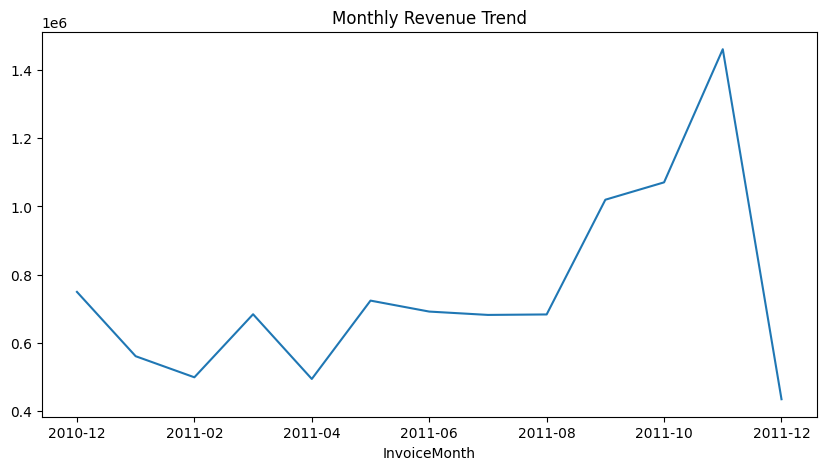

In [ ]:
df.groupby("InvoiceMonth")["AmountSpent"].sum().plot(title="Monthly Revenue Trend", figsize=(10,5))


Observations:
Revenue dipped during early 2011 (especially around March–April).

A steady upward trend begins from August 2011, peaking in November 2011.

Sharp drop in December 2011, likely due to incomplete month data or operational shutdown.

💡 Business Insights:
Growth Acceleration:
From August to November 2011, there is clear growth — could be due to seasonal demand (e.g., holiday season ramp-up).

Strategy Opportunity:
Months like May–July show flat revenue — these may benefit from targeted promotions to boost sales.

Caution with December:
The steep drop in December is likely due to partial data capture. Avoid interpreting it as customer drop-off without confirmation.



In [ ]:
import seaborn as sns

<Axes: xlabel='DayOfWeek', ylabel='AmountSpent'>

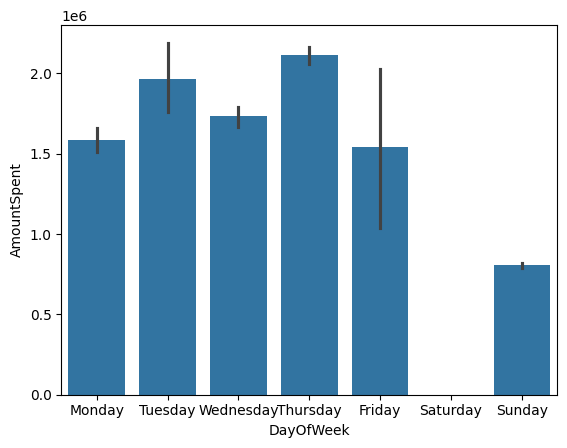

In [ ]:
sns.barplot(data=df, x="DayOfWeek", y="AmountSpent", estimator=sum,
            order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])


📌 Insight: Reveals peak shopping days. Useful for planning promotions or staffing.
✅ Observations:
Thursday is the top-performing day, followed by Tuesday and Wednesday.

Sunday and Saturday have the lowest spending, indicating lower customer engagement on weekends.

Friday has high variability (wide error bar), possibly due to inconsistent shopping behavior.

💡 Business Insights:
Peak Revenue Days:
Focus marketing efforts on Tuesdays and Thursdays — these are high-performing revenue days.

Campaign Planning:
Avoid pushing high-stakes campaigns on weekends, especially Sundays, which see minimal spending.

Customer Behavior:
Likely indicates B2B behavior, where purchases are made during business hours on weekdays.



[Text(0.5, 1.0, 'Sales by Hour')]

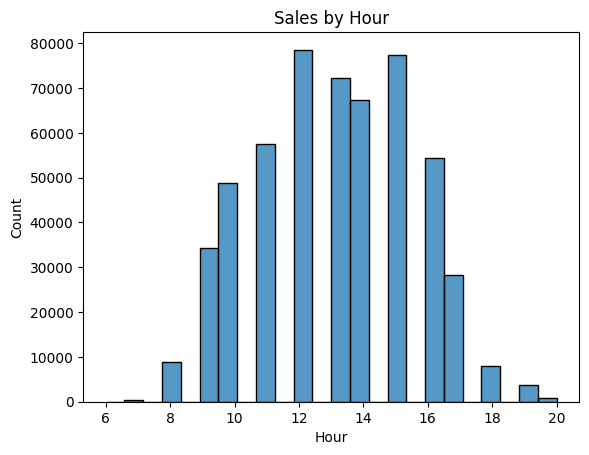

In [ ]:
sns.histplot(df["Hour"], bins=24).set(title="Sales by Hour")


Observations:
Activity begins around 8 AM and gradually rises.

Sharp increase from 9 AM, peaking between 12 PM–3 PM.

Post 3 PM, there's a gradual decline in transaction volume.

Very few transactions occur after 5 PM.

💡 Business Insights:
Campaign Timing: Target email or promotional campaigns around 11 AM–2 PM.

Customer Engagement: Customers are more active during midday — this could correlate with lunch breaks or habitual shopping behavior.

Staffing/Support: Allocate more support or operational staff during peak hours to handle increased order volume.

<Axes: title={'center': 'Return Rate by Segment'}, xlabel='Segment'>

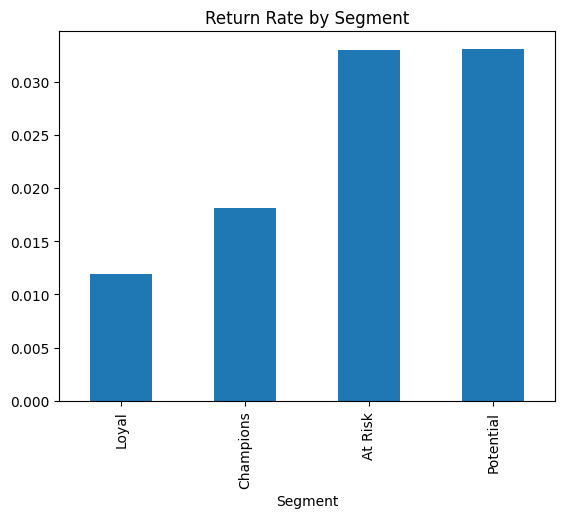

In [ ]:
df.groupby("Segment")["IsReturn"].mean().sort_values().plot(kind="bar", title="Return Rate by Segment")


✅ Observations:
"At Risk" and "Potential" segments show the highest return rates (~3.3%).

"Champions" and "Loyal" customers have noticeably lower return rates, especially Loyal customers (~1.2%).

💡 Business Insights:
Quality & Trust Matter:
Loyal customers return less, likely due to trust in the brand and product satisfaction.

Risk Management:
High return rates in the “At Risk” and “Potential” segments may indicate:

Unmet expectations

Impulse purchases

Miscommunication during promotions

Actionable Tip:
These segments should be targeted with better education, clearer product descriptions, or loyalty programs to reduce return behavior.

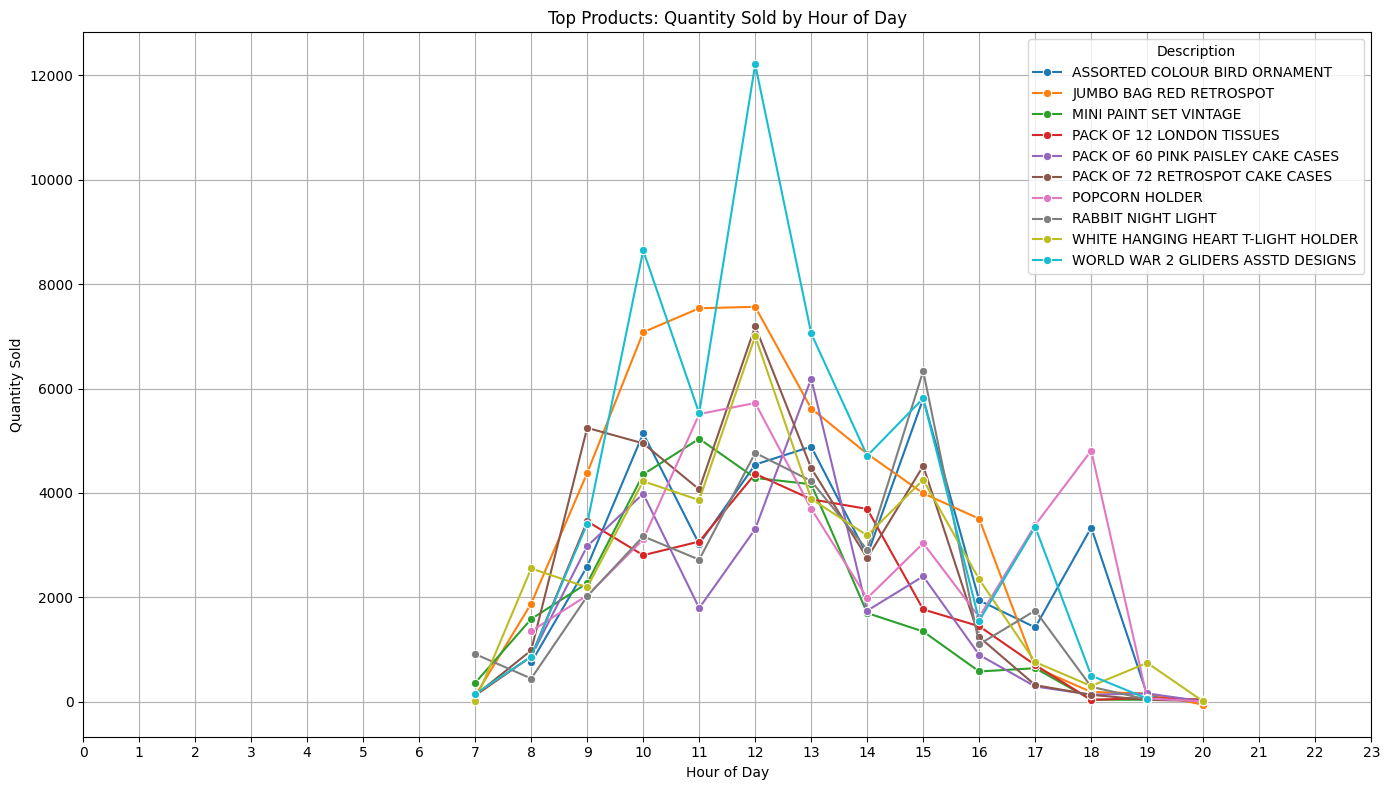

In [ ]:
# Convert InvoiceDate to datetime in case it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract hour again to ensure it's consistent
df['Hour'] = df['InvoiceDate'].dt.hour

# Find top 10 most sold products by quantity
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_product_names = top_products.index.tolist()

# Filter data for only those top products
top_products_df = df[df['Description'].isin(top_product_names)]

# Group by product and hour to see when they're sold
product_hourly_sales = top_products_df.groupby(['Description', 'Hour'])['Quantity'].sum().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Plotting sales hour-wise for top 5 products
plt.figure(figsize=(14, 8))
sns.lineplot(data=product_hourly_sales, x='Hour', y='Quantity', hue='Description', marker='o')
plt.title('Top Products: Quantity Sold by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Quantity Sold')
plt.xticks(ticks=range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


Most top products experience peak sales between 10 AM and 2 PM.

There's a sharp drop after 4 PM, indicating reduced shopping activity later in the day.

🔍 Individual Product Highlights:
"WHITE HANGING HEART T-LIGHT HOLDER" and "WORLD WAR 2 GLIDERS ASSTD DESIGNS" peak sharply around 12 PM.

Products like "PACK OF 72 RETROSPOT CAKE CASES" and "RABBIT NIGHT LIGHT" have more distributed activity across the peak window (10 AM–3 PM).

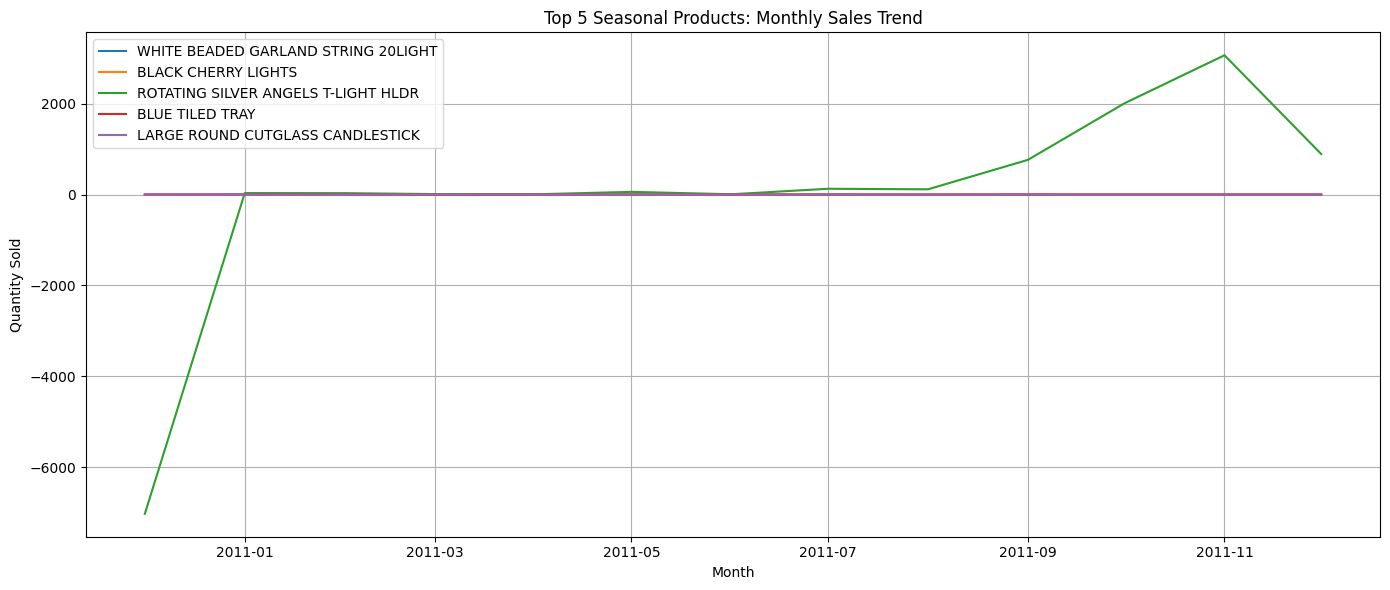

In [ ]:
# Convert InvoiceDate to datetime just to be sure
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period("M")

# Step 1: Aggregate monthly sales quantity per product
monthly_product_sales = (
    df.groupby([df['InvoiceMonth'], 'Description'])['Quantity']
    .sum()
    .reset_index()
    .rename(columns={'Quantity': 'MonthlySales'})
)

# Step 2: Pivot to get time series per product
product_time_series = monthly_product_sales.pivot(index='InvoiceMonth', columns='Description', values='MonthlySales').fillna(0)

# Step 3: Calculate coefficient of variation (std/mean) to find seasonally varying products
seasonality_score = product_time_series.std() / product_time_series.mean()

# Step 4: Select top 5 most seasonal products
top_seasonal_products = seasonality_score.sort_values(ascending=False).head(5).index.tolist()

# Step 5: Plot time series of these seasonal products
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
for product in top_seasonal_products:
    plt.plot(product_time_series.index.to_timestamp(), product_time_series[product], label=product)

plt.title("Top 5 Seasonal Products: Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-18-446024082.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Segment', order=df['Segment'].value_counts().index, palette='viridis')


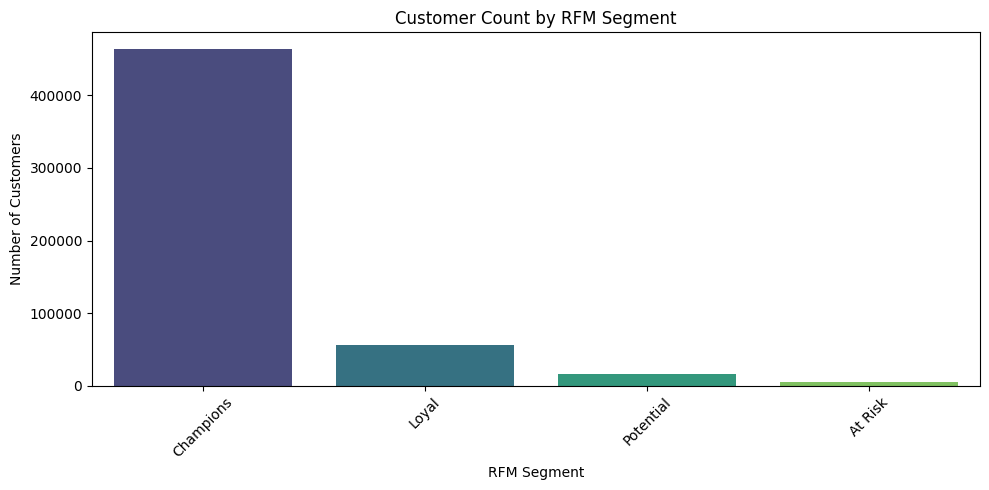

/tmp/ipython-input-18-446024082.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rfm_score_counts.index, y=rfm_score_counts.values, palette='coolwarm')


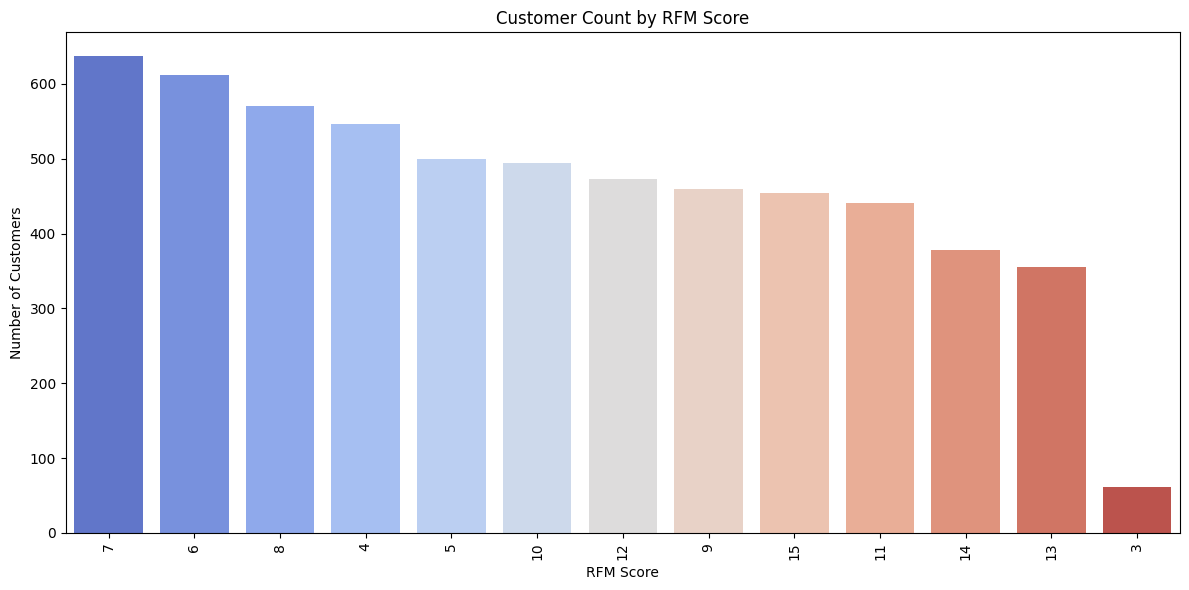

/tmp/ipython-input-18-446024082.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_monetary_by_segment.index, y=avg_monetary_by_segment.values, palette='magma')


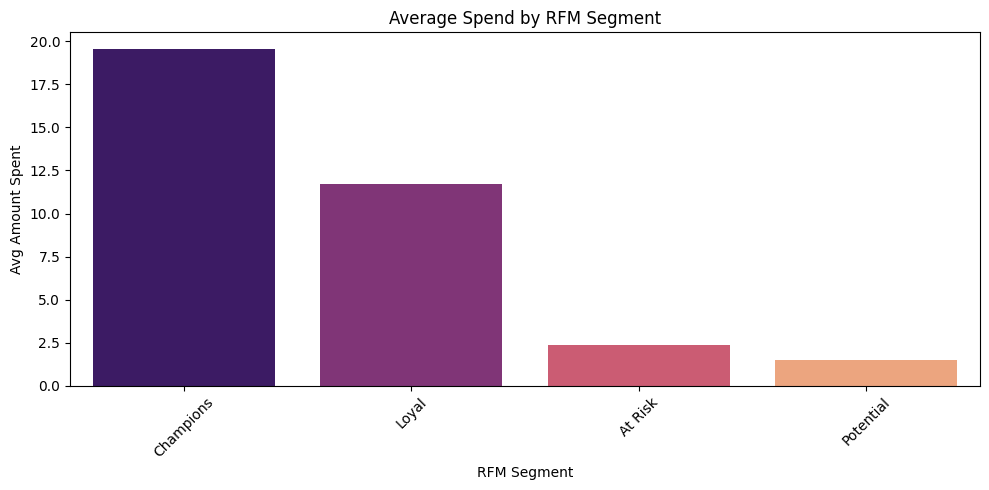

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert RFM_Score to string if not already
df['RFM_Score'] = df['RFM_Score'].astype(str)

# 1. Distribution of RFM Segments
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Segment', order=df['Segment'].value_counts().index, palette='viridis')
plt.title("Customer Count by RFM Segment")
plt.xlabel("RFM Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Heatmap of RFM combinations
#rfm_heatmap = df.groupby(['RFM_Score'])['CustomerID'].nunique().unstack().fillna(0)

# Optional: If RFM_Score is a single score like '444', we can count occurrences instead
rfm_score_counts = df.groupby("RFM_Score")["CustomerID"].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=rfm_score_counts.index, y=rfm_score_counts.values, palette='coolwarm')
plt.title("Customer Count by RFM Score")
plt.xlabel("RFM Score")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. Average Monetary by RFM Segment
plt.figure(figsize=(10, 5))
avg_monetary_by_segment = df.groupby("Segment")["AmountSpent"].mean().sort_values(ascending=False)
sns.barplot(x=avg_monetary_by_segment.index, y=avg_monetary_by_segment.values, palette='magma')
plt.title("Average Spend by RFM Segment")
plt.ylabel("Avg Amount Spent")
plt.xlabel("RFM Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
clustering_features = ['Recency', 'Frequency', 'Monetary', 'BasketSize', 'IsReturn', 'IsWeekend', 'Hour']

# Check if all features exist and are numeric
df_clustering = df[clustering_features].copy()

# Basic summary to inspect scale
summary_stats = df_clustering.describe().T
summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats[["mean", "std", "min", "max", "range"]]


KeyError: "['Recency', 'Frequency', 'Monetary'] not in index"

In [ ]:
import pandas as pd
import os

# Parameters
file_path = "/content/retail_final_clustered.csv"
chunk_size = 5000  # adjust based on memory and S3 limits
output_dir = "/bin"

# Create directory to store chunks
os.makedirs(output_dir, exist_ok=True)

# Read and save chunks
chunk_list = []
for i, chunk in enumerate(pd.read_csv(file_path, chunksize=chunk_size)):
    chunk_file = os.path.join(output_dir, f"retail_chunk_{i+1}.csv")
    chunk.to_csv(chunk_file, index=False)
    chunk_list.append(chunk_file)

chunk_list  # Return the list of created chunk file paths


['/bin/retail_chunk_1.csv',
 '/bin/retail_chunk_2.csv',
 '/bin/retail_chunk_3.csv',
 '/bin/retail_chunk_4.csv',
 '/bin/retail_chunk_5.csv',
 '/bin/retail_chunk_6.csv',
 '/bin/retail_chunk_7.csv',
 '/bin/retail_chunk_8.csv',
 '/bin/retail_chunk_9.csv',
 '/bin/retail_chunk_10.csv',
 '/bin/retail_chunk_11.csv',
 '/bin/retail_chunk_12.csv',
 '/bin/retail_chunk_13.csv',
 '/bin/retail_chunk_14.csv',
 '/bin/retail_chunk_15.csv',
 '/bin/retail_chunk_16.csv',
 '/bin/retail_chunk_17.csv',
 '/bin/retail_chunk_18.csv',
 '/bin/retail_chunk_19.csv',
 '/bin/retail_chunk_20.csv',
 '/bin/retail_chunk_21.csv',
 '/bin/retail_chunk_22.csv',
 '/bin/retail_chunk_23.csv',
 '/bin/retail_chunk_24.csv',
 '/bin/retail_chunk_25.csv',
 '/bin/retail_chunk_26.csv',
 '/bin/retail_chunk_27.csv',
 '/bin/retail_chunk_28.csv',
 '/bin/retail_chunk_29.csv',
 '/bin/retail_chunk_30.csv',
 '/bin/retail_chunk_31.csv',
 '/bin/retail_chunk_32.csv',
 '/bin/retail_chunk_33.csv',
 '/bin/retail_chunk_34.csv',
 '/bin/retail_chunk_35.